# 1083 Albumin Initial ML

### By: Ian Weimer

In [1]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.7.0


## Imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import pydotplus
from imblearn.over_sampling import SMOTE, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [3]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/K70_Cohort/K70_matched.csv')

In [4]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [5]:
df.head()

encounterid  ICU  Cirrhosis  CCI  qSOFA    MELD  \
0  07ea020e-dbef-418c-b4b2-be3d104ba6be    0          1    2      1  22.000   
1  03255b92-d10f-41fd-8387-9e223f9be912    0          1    3      0  16.574   
2  1dc64909-cbe3-46e2-94ae-7c6de6a38364    0          1   10      0  18.000   
3  47905ac2-9758-4da5-adc5-1349c4c232a9    0          1    2      0  18.000   
4  f0f847d0-a8c0-4d11-b500-110f6f495f1b    0          1    6      0   8.000   

   SEWS  propensity_score  propensity_logit  albumin_24hrs  \
0     2          0.635804          0.557197              1   
1     0          0.390010         -0.447270              1   
2     0          0.591606          0.370610              1   
3     0          0.401814         -0.397912              1   
4     0          0.262973         -1.030574              1   

                               personid   LOS_days  90_day_mortality  \
0  0b195e78-8b4c-4885-a6f1-162738405bf4  13.857639                 0   
1  0c08fc94-32eb-4e48-bd22-f075f911f7cb   5.127778                 0   
2  0d35b91a-883d-43cb-ad15-31123a3008c8  12.054167                 0   
3  14a7cf74-4469-4102-aac3-cdf906baa891   0.278912                 0   
4  16e21cc6-4d8c-44b1-b5e6-206c5f466893   0.307639                 0   

   90_day_readmission  hospital_free_days  albumin_timing  albumin  
0                 0.0                  77             2.0        1  
1                 0.0                  27             1.0        1  
2                 0.0                  78             1.0        1  
3                 0.0                  89             1.0        1  
4                 1.0                   1             1.0        1

In [8]:
df[df['albumin_24hrs'] == 1].LOS_days.describe()

count    6644.000000
mean        8.346971
std         8.023175
min         0.080556
25%         2.964583
50%         5.893750
75%        11.168006
max        54.840972
Name: LOS_days, dtype: float64

In [9]:
df[df['albumin_24hrs'] == 0].LOS_days.describe()

count    6644.000000
mean        6.781306
std         7.163589
min         0.000000
25%         2.191319
50%         4.726273
75%         8.754861
max        54.496528
Name: LOS_days, dtype: float64

In [10]:
df[df['albumin_24hrs'] == 1].hospital_free_days.describe()

count    6644.000000
mean       39.662553
std        36.040833
min         0.000000
25%         0.000000
50%        33.000000
75%        80.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [11]:
df[df['albumin_24hrs'] == 0].hospital_free_days.describe()

count    6644.000000
mean       46.493829
std        35.726251
min         0.000000
25%         6.000000
50%        53.000000
75%        83.000000
max        90.000000
Name: hospital_free_days, dtype: float64

In [15]:
df.drop(columns=['encounterid', 'personid', 'propensity_score', 'propensity_logit', 'albumin', 'albumin_timing'], inplace=True)

In [12]:
df.drop(columns=['90_day_mortality', '90_day_readmission', 'LOS_days'], inplace=True)

In [16]:
df.shape

(13288, 8)

In [17]:
df.describe()

ICU     Cirrhosis           CCI         qSOFA          MELD  \
count  13288.000000  13288.000000  13288.000000  13288.000000  13288.000000   
mean       0.217113      0.891180      4.034317      0.698450     24.255708   
std        0.412296      0.311425      2.416956      0.772967      8.535608   
min        0.000000      0.000000      0.000000      0.000000      6.000000   
25%        0.000000      1.000000      3.000000      0.000000     18.376000   
50%        0.000000      1.000000      3.000000      1.000000     24.620000   
75%        0.000000      1.000000      5.000000      1.000000     30.330000   
max        1.000000      1.000000     17.000000      3.000000     40.000000   

               SEWS  albumin_24hrs  hospital_free_days  
count  13288.000000   13288.000000        13288.000000  
mean       1.379741       0.500000           43.078191  
std        1.673190       0.500019           36.044748  
min        0.000000       0.000000            0.000000  
25%        0.000000       0.000000            2.000000  
50%        1.000000       0.500000           43.000000  
75%        2.000000       1.000000           82.000000  
max       12.000000       1.000000           90.000000

In [18]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

In [19]:
#df['LOS_days'] = df['LOS_days']/24
#df.drop(columns=['LOS_days'], inplace=True)

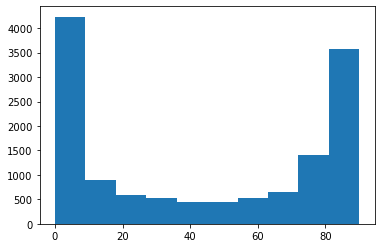

In [20]:
plt.hist(df['hospital_free_days']);

In [21]:
df['hospital_free_days'].describe()

count    13288.000000
mean        43.078191
std         36.044748
min          0.000000
25%          2.000000
50%         43.000000
75%         82.000000
max         90.000000
Name: hospital_free_days, dtype: float64

In [22]:
# Calculate Tertiles

q1 = df['hospital_free_days'].quantile(q=(1/3))
q2 = df['hospital_free_days'].quantile(q=(2/3))
print(q1)
print(q2)

10.0
76.0


In [23]:
# bin the LOS_days var

HFD = df['hospital_free_days']
m = max(HFD)

bins = [0, 10.0, 76.0, m]
labels=[0, 1, 2]

# 0 - Low HFD
# 1 - Medium HFD
# 2 - High/Long HFD

df['hospital_free_days'] = pd.cut(HFD, bins=bins, labels=labels, include_lowest=True)

In [24]:
df['hospital_free_days'].value_counts()

0    4473
1    4460
2    4355
Name: hospital_free_days, dtype: int64

## Modeling

In [25]:
# establish target feature, LOS_days, as y feature
y = df['hospital_free_days']
# drop target feature from features dataframe
X = df.drop(columns = ['hospital_free_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [26]:
cols

Index(['ICU', 'Cirrhosis', 'CCI', 'qSOFA', 'MELD', 'SEWS', 'albumin_24hrs'], dtype='object')

## Standardize Data

In [27]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [28]:
X.head()

ICU  Cirrhosis  CCI  qSOFA    MELD  SEWS  albumin_24hrs
0    0          1    2      1  22.000     2              1
1    0          1    3      0  16.574     0              1
2    0          1   10      0  18.000     0              1
3    0          1    2      0  18.000     0              1
4    0          1    6      0   8.000     0              1

In [29]:
X.shape

(13288, 7)

## Train Test Split

In [113]:
#sm = SMOTENC(random_state=42, categorical_features = [0, 1, 2, 3, 4, 5, \
#                                                     6, 7, 8, 9, 10])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [114]:
#sm = SMOTEN(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [30]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

In [31]:
y_train.value_counts()

1    3582
0    3545
2    3503
Name: hospital_free_days, dtype: int64

## Multinomial Logistic Regression

In [32]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial')

Feature: ICU Score: 0.16706
Feature: Cirrhosis Score: 0.02184
Feature: CCI Score: 0.06659
Feature: qSOFA Score: -0.00385
Feature: MELD Score: 0.03073
Feature: SEWS Score: 0.09341
Feature: albumin_24hrs Score: 0.26222


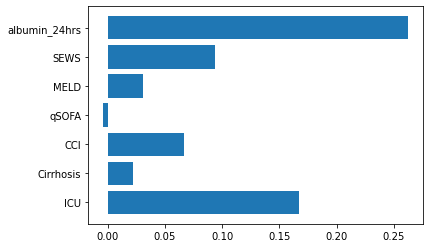

In [33]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [34]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

               Importance
albumin_24hrs    1.299813
ICU              1.181824
SEWS             1.097907
CCI              1.068860
MELD             1.031202
Cirrhosis        1.022084
qSOFA            0.996154


In [35]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [36]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1960  835  750]
 [1205 1280 1097]
 [1161 1066 1276]]


In [37]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.45      0.55      0.50      3545
           1       0.40      0.36      0.38      3582
           2       0.41      0.36      0.39      3503

    accuracy                           0.42     10630
   macro avg       0.42      0.42      0.42     10630
weighted avg       0.42      0.42      0.42     10630



In [38]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[520 208 200]
 [307 307 264]
 [290 281 281]]


In [39]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.47      0.56      0.51       928
           1       0.39      0.35      0.37       878
           2       0.38      0.33      0.35       852

    accuracy                           0.42      2658
   macro avg       0.41      0.41      0.41      2658
weighted avg       0.41      0.42      0.41      2658



## 1: Decision Tree (Max Depth=3)

In [54]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=3)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Feature: ICU Score: 0.00000
Feature: CCI Score: 0.49713
Feature: bl_albumin_value Score: 0.25695
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.09601
Feature: beta_blocker Score: 0.14991
Feature: Cirrhosis_score Score: 0.00000
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.00000
Feature: albumin_24_hours Score: 0.00000


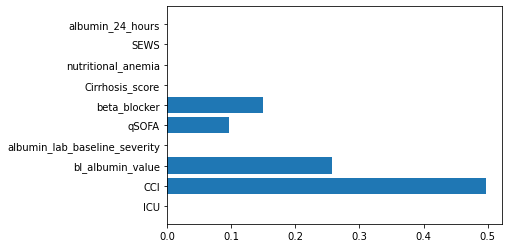

In [55]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [56]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [57]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[21970 20687  5664]
 [14117 23938  8532]
 [14297 23147  9980]]


In [58]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.44      0.45      0.45     48321
           1       0.35      0.51      0.42     46587
           2       0.41      0.21      0.28     47424

    accuracy                           0.39    142332
   macro avg       0.40      0.39      0.38    142332
weighted avg       0.40      0.39      0.38    142332



In [59]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[5519 5222 1357]
 [3537 5915 2178]
 [3492 5753 2611]]


In [60]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.44      0.46      0.45     12098
           1       0.35      0.51      0.41     11630
           2       0.42      0.22      0.29     11856

    accuracy                           0.39     35584
   macro avg       0.40      0.40      0.38     35584
weighted avg       0.41      0.39      0.38     35584



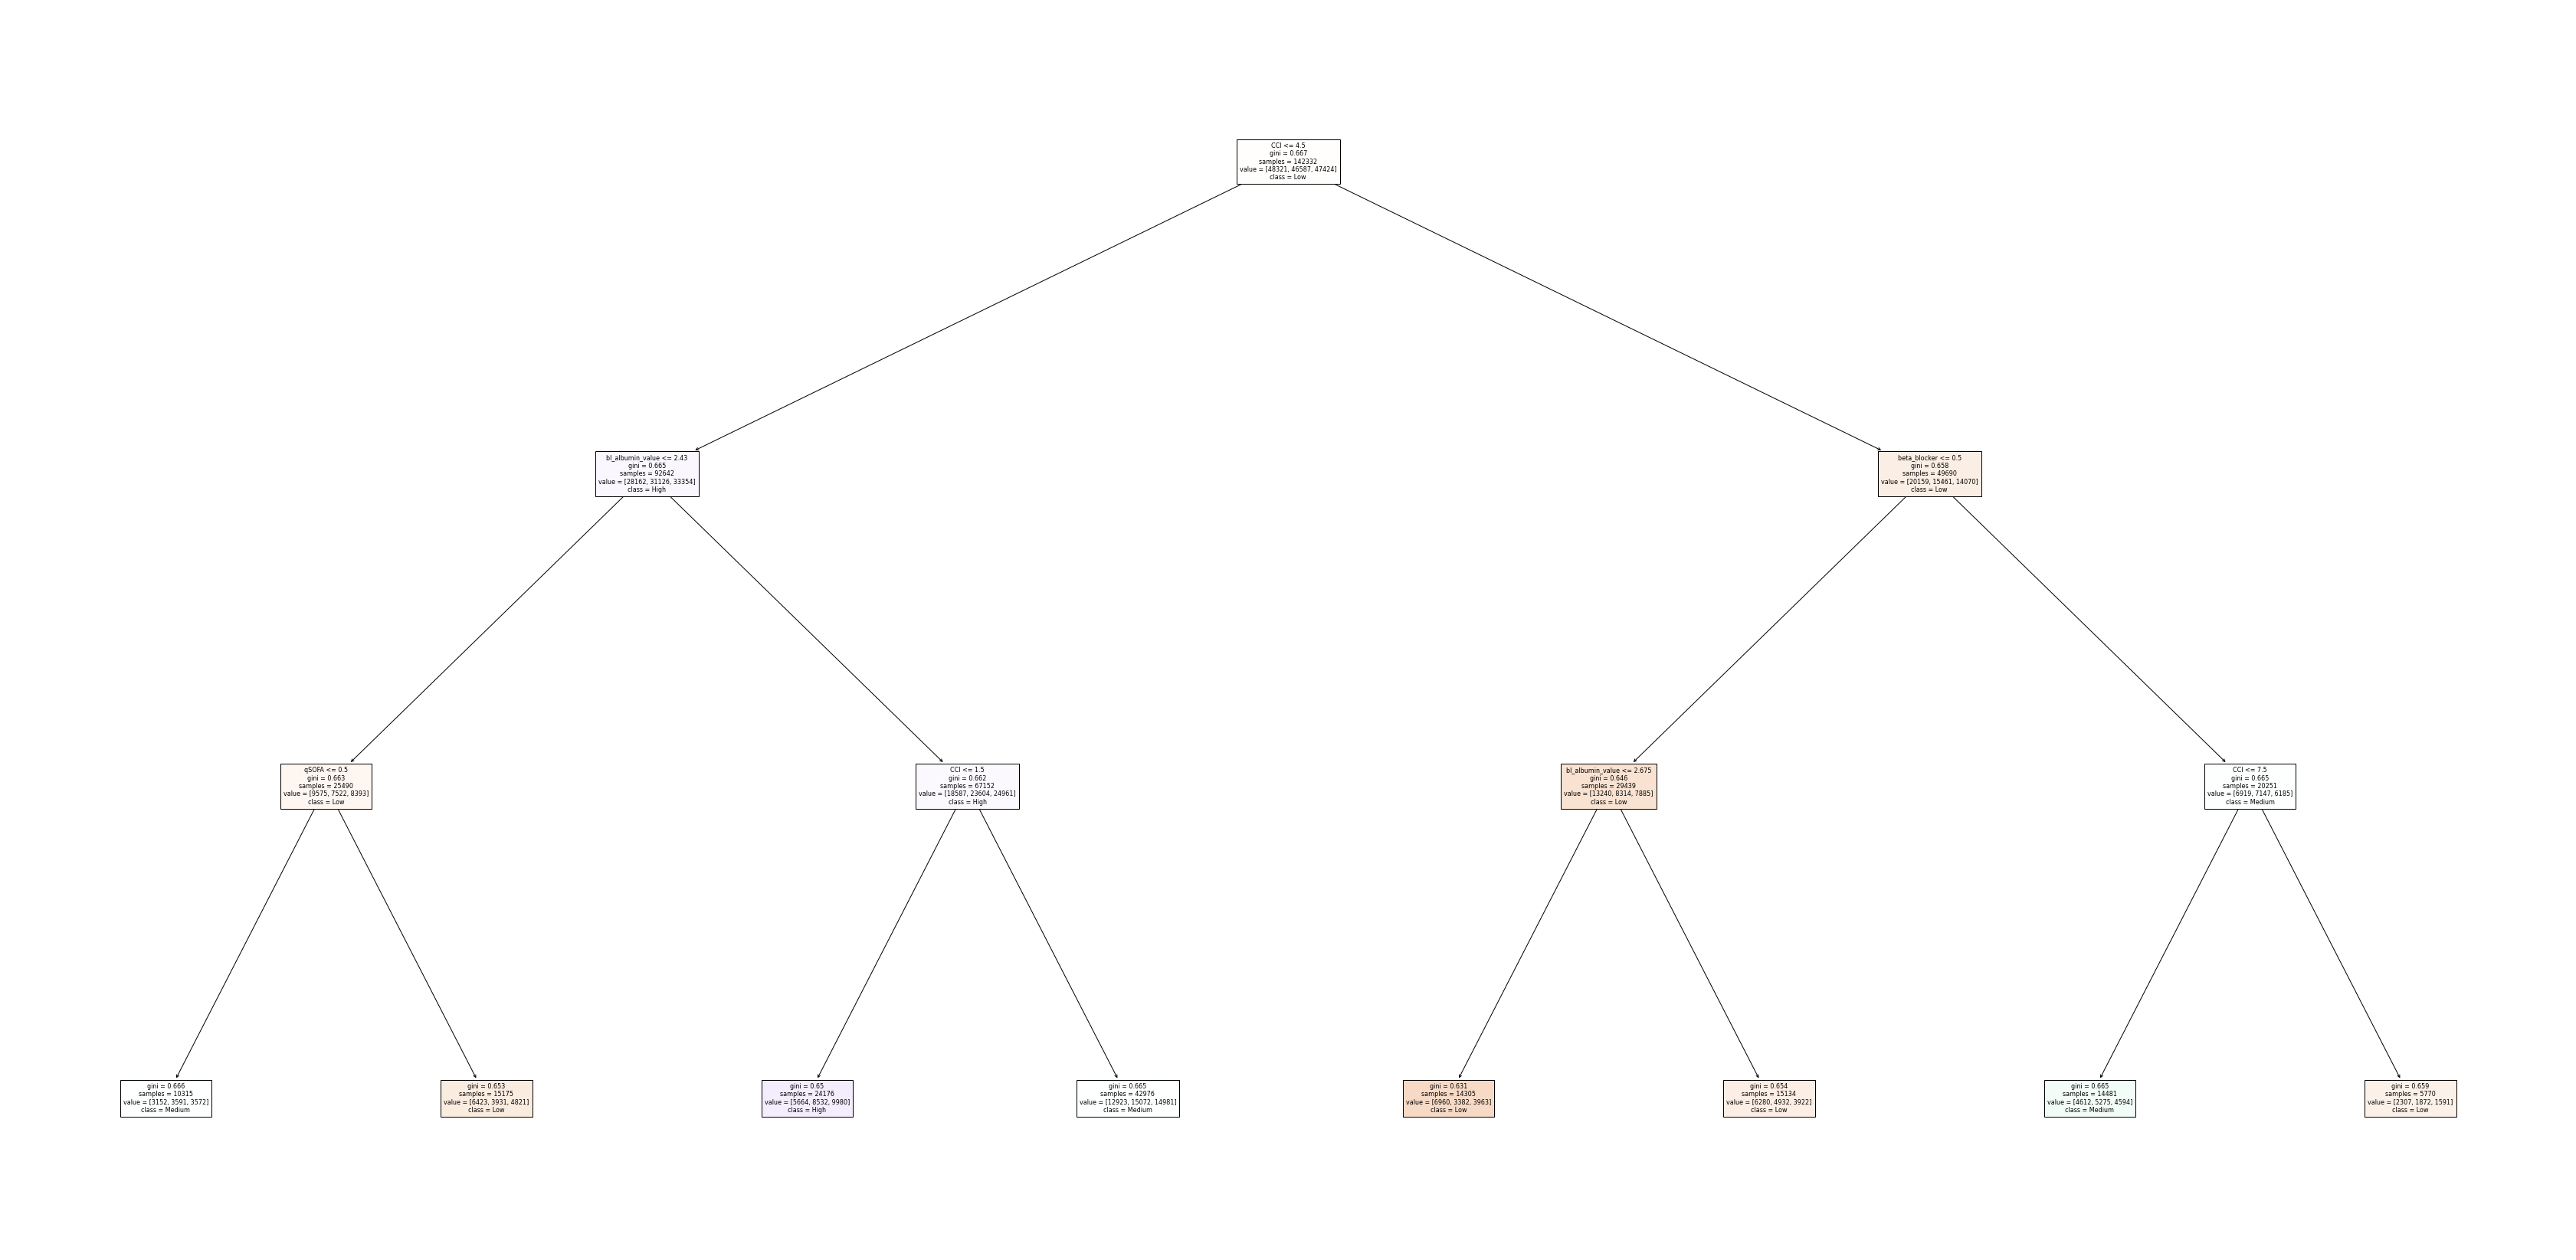

In [61]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [347]:
pwd

'C:\\Users\\Iweimer\\Desktop\\BB_Git\\1083-albumin-data-exploration\\ML\\Blood_Diseases_Cohort'

In [348]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D3_MATCHED_178K.png')

True

## 2: Decision Tree (Max Depth=4)

In [62]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Feature: ICU Score: 0.00000
Feature: CCI Score: 0.41427
Feature: bl_albumin_value Score: 0.21477
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.11773
Feature: beta_blocker Score: 0.17172
Feature: Cirrhosis_score Score: 0.00000
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.02655
Feature: albumin_24_hours Score: 0.05496


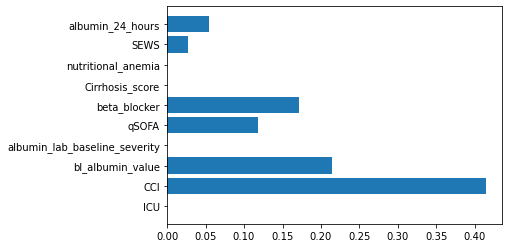

In [63]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [64]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [65]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[23993 13102 11226]
 [16086 14064 16437]
 [15889 13316 18219]]


In [66]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46     48321
           1       0.35      0.30      0.32     46587
           2       0.40      0.38      0.39     47424

    accuracy                           0.40    142332
   macro avg       0.39      0.39      0.39    142332
weighted avg       0.39      0.40      0.39    142332



In [67]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[6030 3350 2718]
 [4024 3504 4102]
 [3858 3355 4643]]


In [68]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46     12098
           1       0.34      0.30      0.32     11630
           2       0.41      0.39      0.40     11856

    accuracy                           0.40     35584
   macro avg       0.39      0.40      0.39     35584
weighted avg       0.39      0.40      0.40     35584



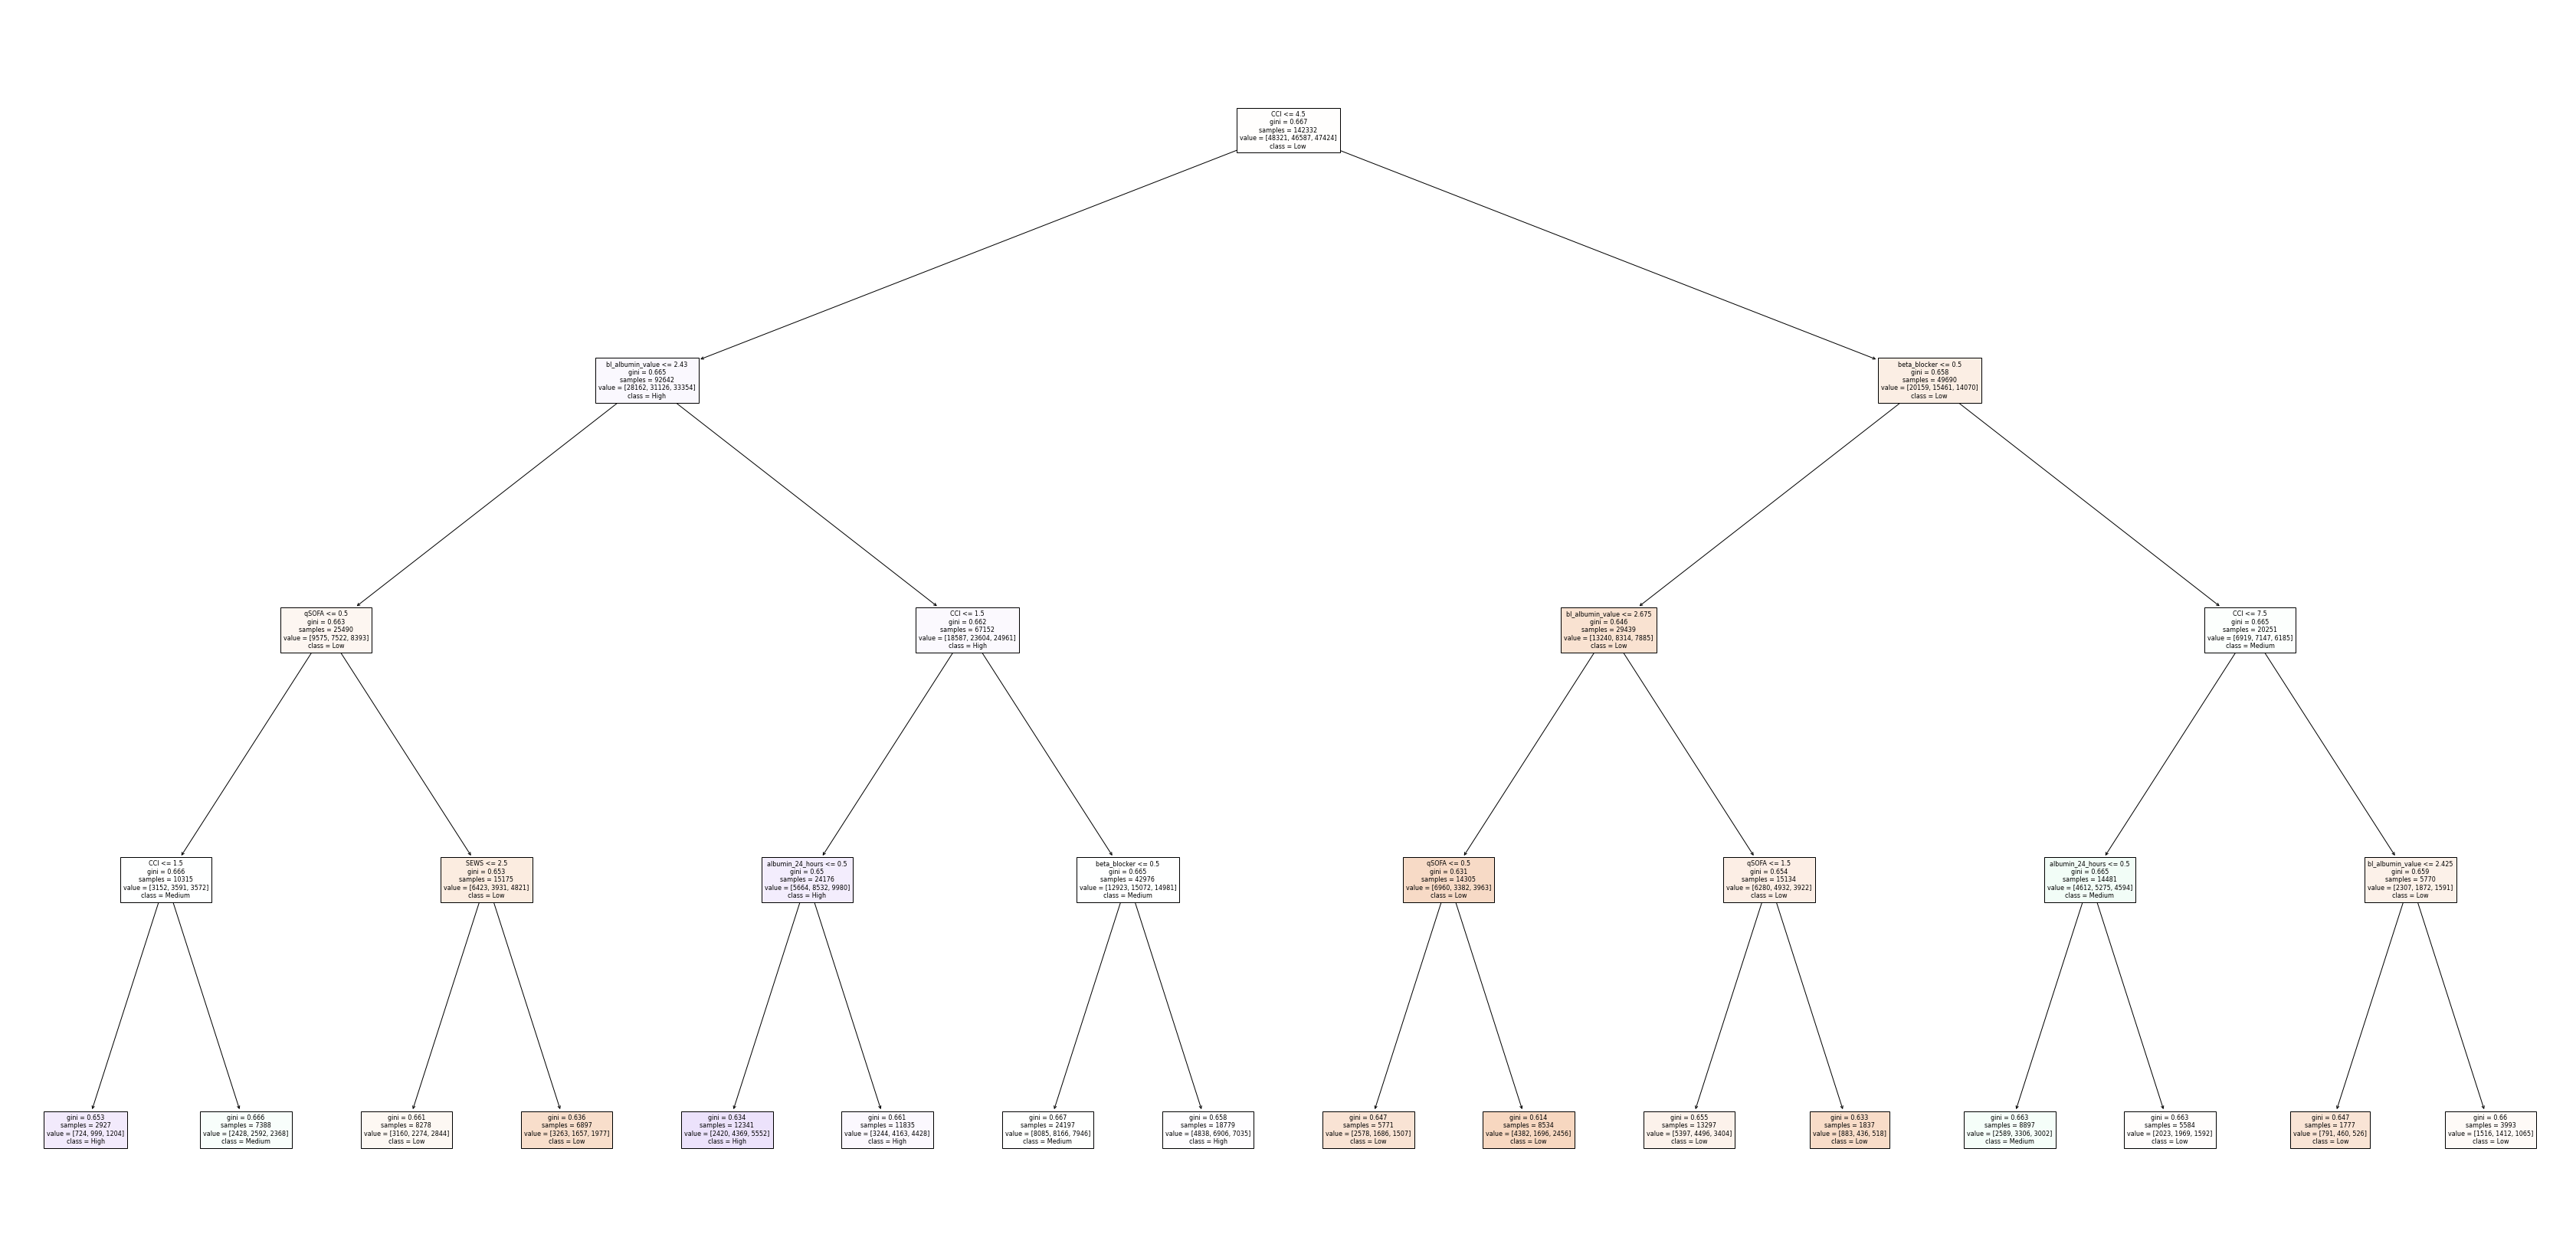

In [69]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [383]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D4_MATCHED_178K.png')

True

## 3: Decision Tree 

In [70]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)

Feature: ICU Score: 0.00000
Feature: CCI Score: 0.38540
Feature: bl_albumin_value Score: 0.20652
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.12579
Feature: beta_blocker Score: 0.16572
Feature: Cirrhosis_score Score: 0.00602
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.05538
Feature: albumin_24_hours Score: 0.05517


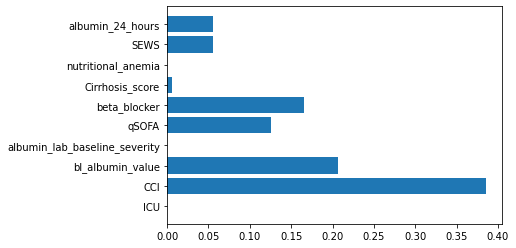

In [71]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [72]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [73]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[28322 11407  8592]
 [19478 14480 12629]
 [19838 12692 14894]]


In [74]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.42      0.59      0.49     48321
           1       0.38      0.31      0.34     46587
           2       0.41      0.31      0.36     47424

    accuracy                           0.41    142332
   macro avg       0.40      0.40      0.40    142332
weighted avg       0.40      0.41      0.40    142332



In [75]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7170 2830 2098]
 [4828 3610 3192]
 [4824 3184 3848]]


In [76]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.43      0.59      0.50     12098
           1       0.38      0.31      0.34     11630
           2       0.42      0.32      0.37     11856

    accuracy                           0.41     35584
   macro avg       0.41      0.41      0.40     35584
weighted avg       0.41      0.41      0.40     35584



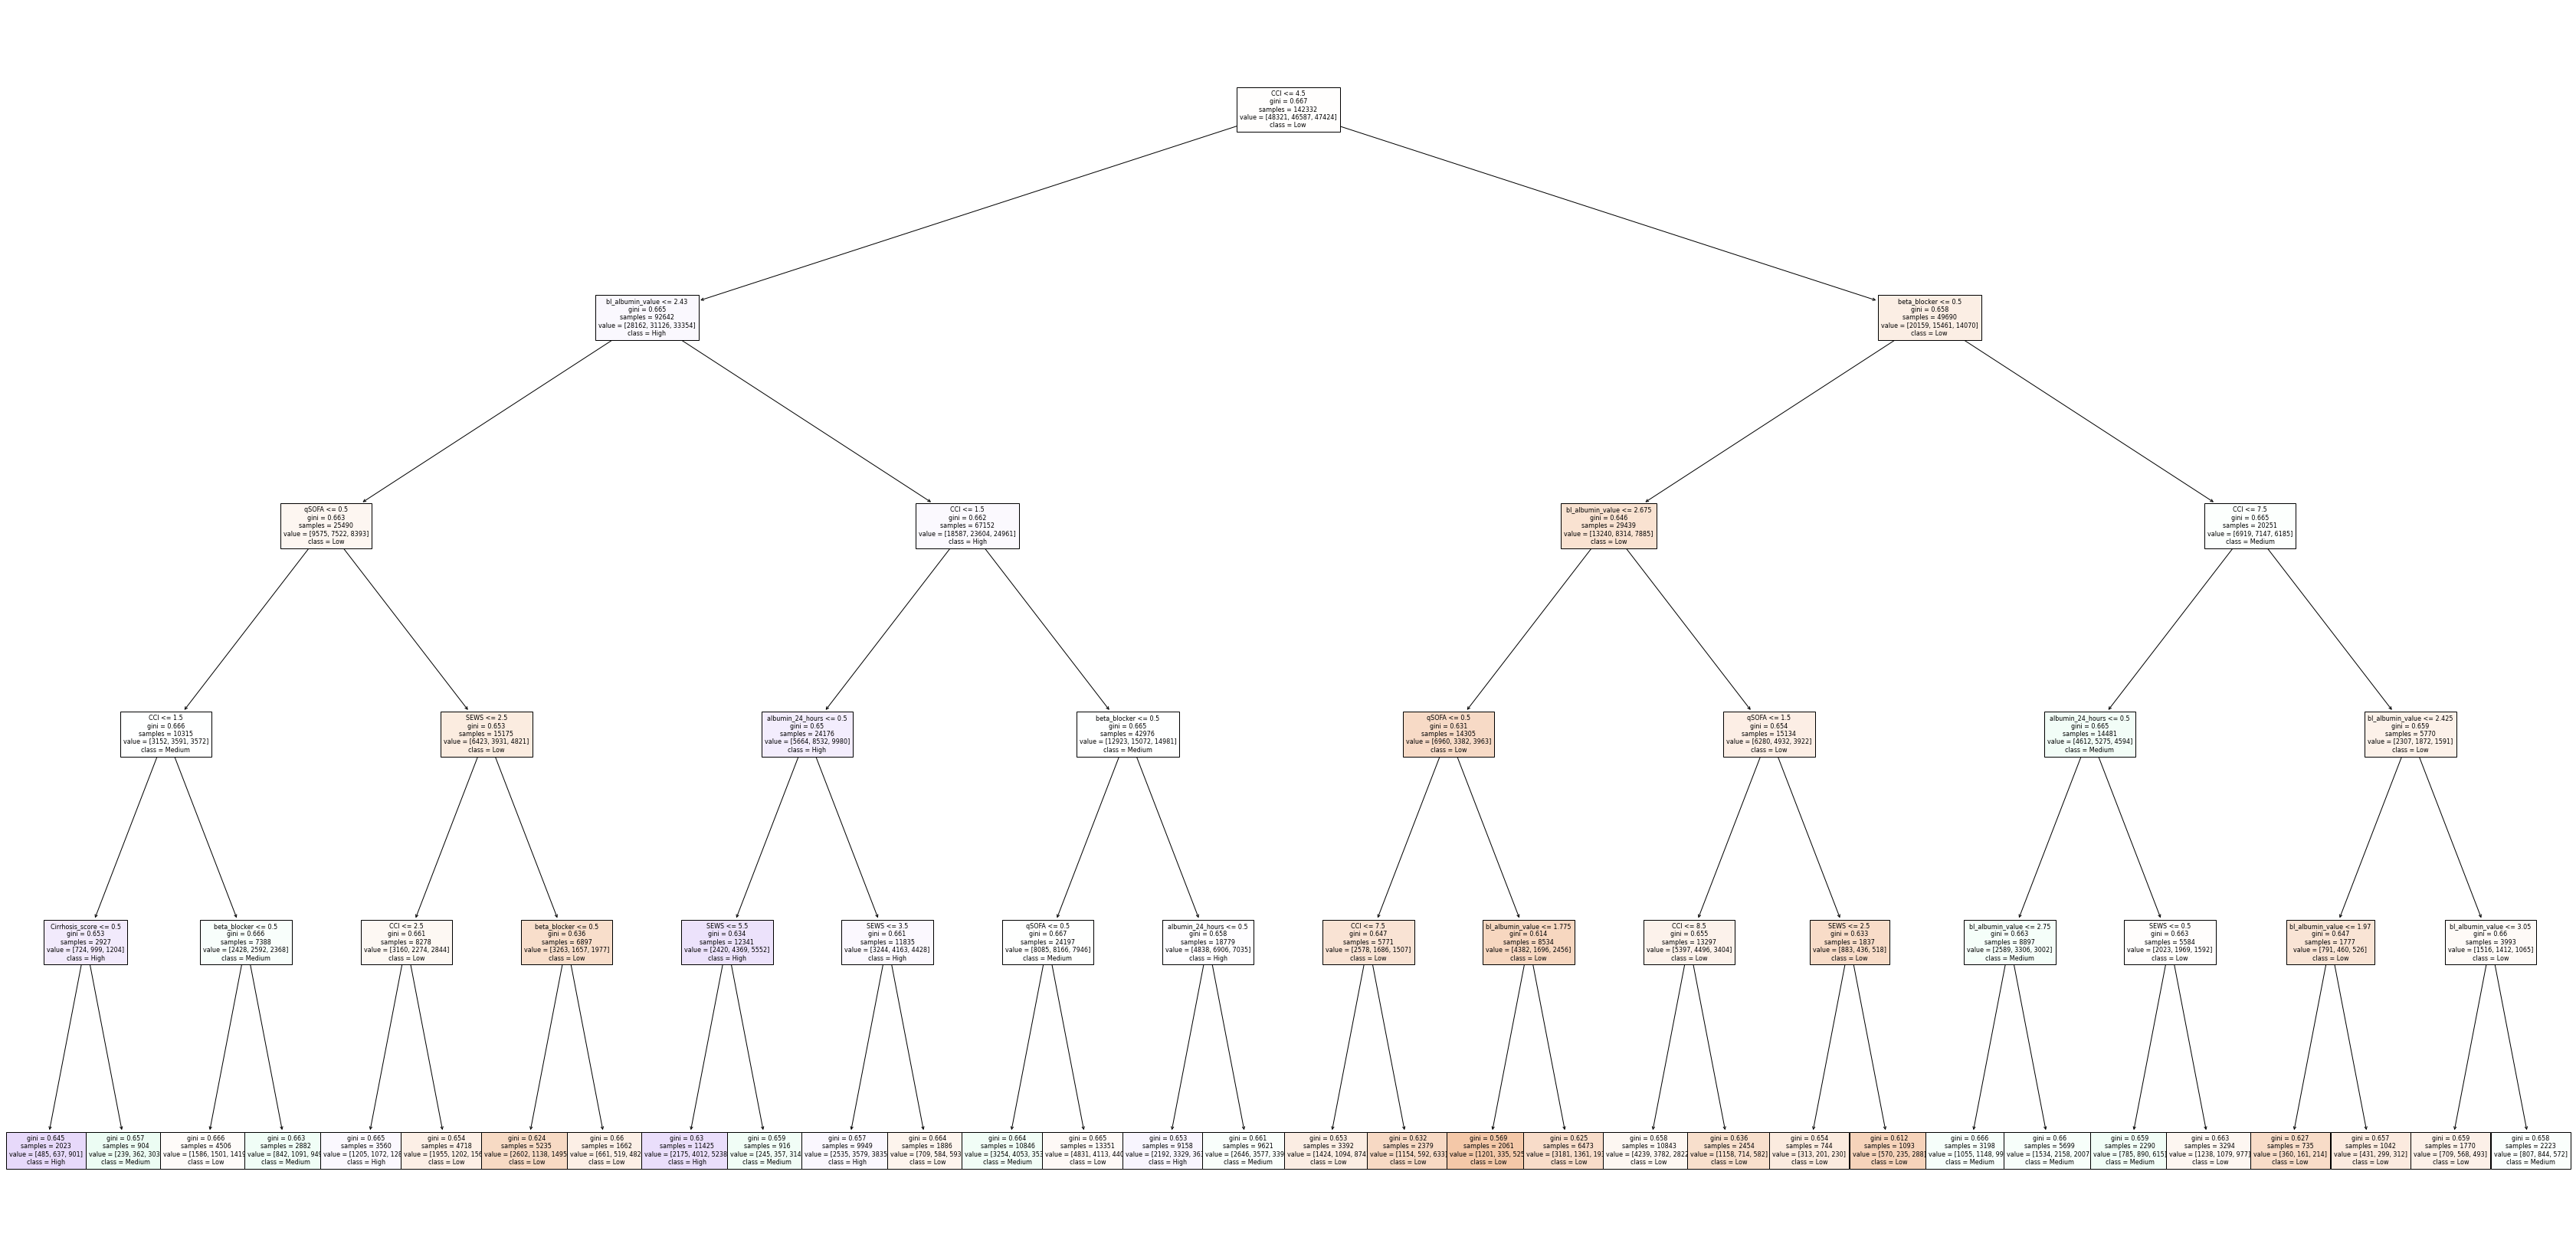

In [77]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [392]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D5_MATCHED_178K.png')

True

## 4: Decision Tree 

In [78]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)

Feature: ICU Score: 0.01066
Feature: CCI Score: 0.36071
Feature: bl_albumin_value Score: 0.21017
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.11776
Feature: beta_blocker Score: 0.15151
Feature: Cirrhosis_score Score: 0.01842
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.07337
Feature: albumin_24_hours Score: 0.05739


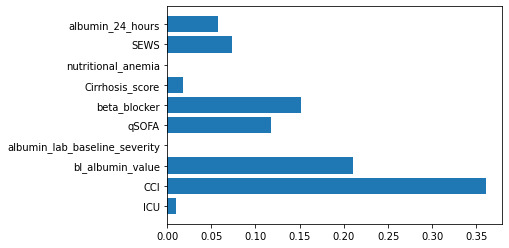

In [79]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [80]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [81]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[27657 13264  7400]
 [18457 17066 11064]
 [19026 14932 13466]]


In [82]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.42      0.57      0.49     48321
           1       0.38      0.37      0.37     46587
           2       0.42      0.28      0.34     47424

    accuracy                           0.41    142332
   macro avg       0.41      0.41      0.40    142332
weighted avg       0.41      0.41      0.40    142332



In [83]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[6946 3306 1846]
 [4595 4226 2809]
 [4620 3815 3421]]


In [84]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.43      0.57      0.49     12098
           1       0.37      0.36      0.37     11630
           2       0.42      0.29      0.34     11856

    accuracy                           0.41     35584
   macro avg       0.41      0.41      0.40     35584
weighted avg       0.41      0.41      0.40     35584



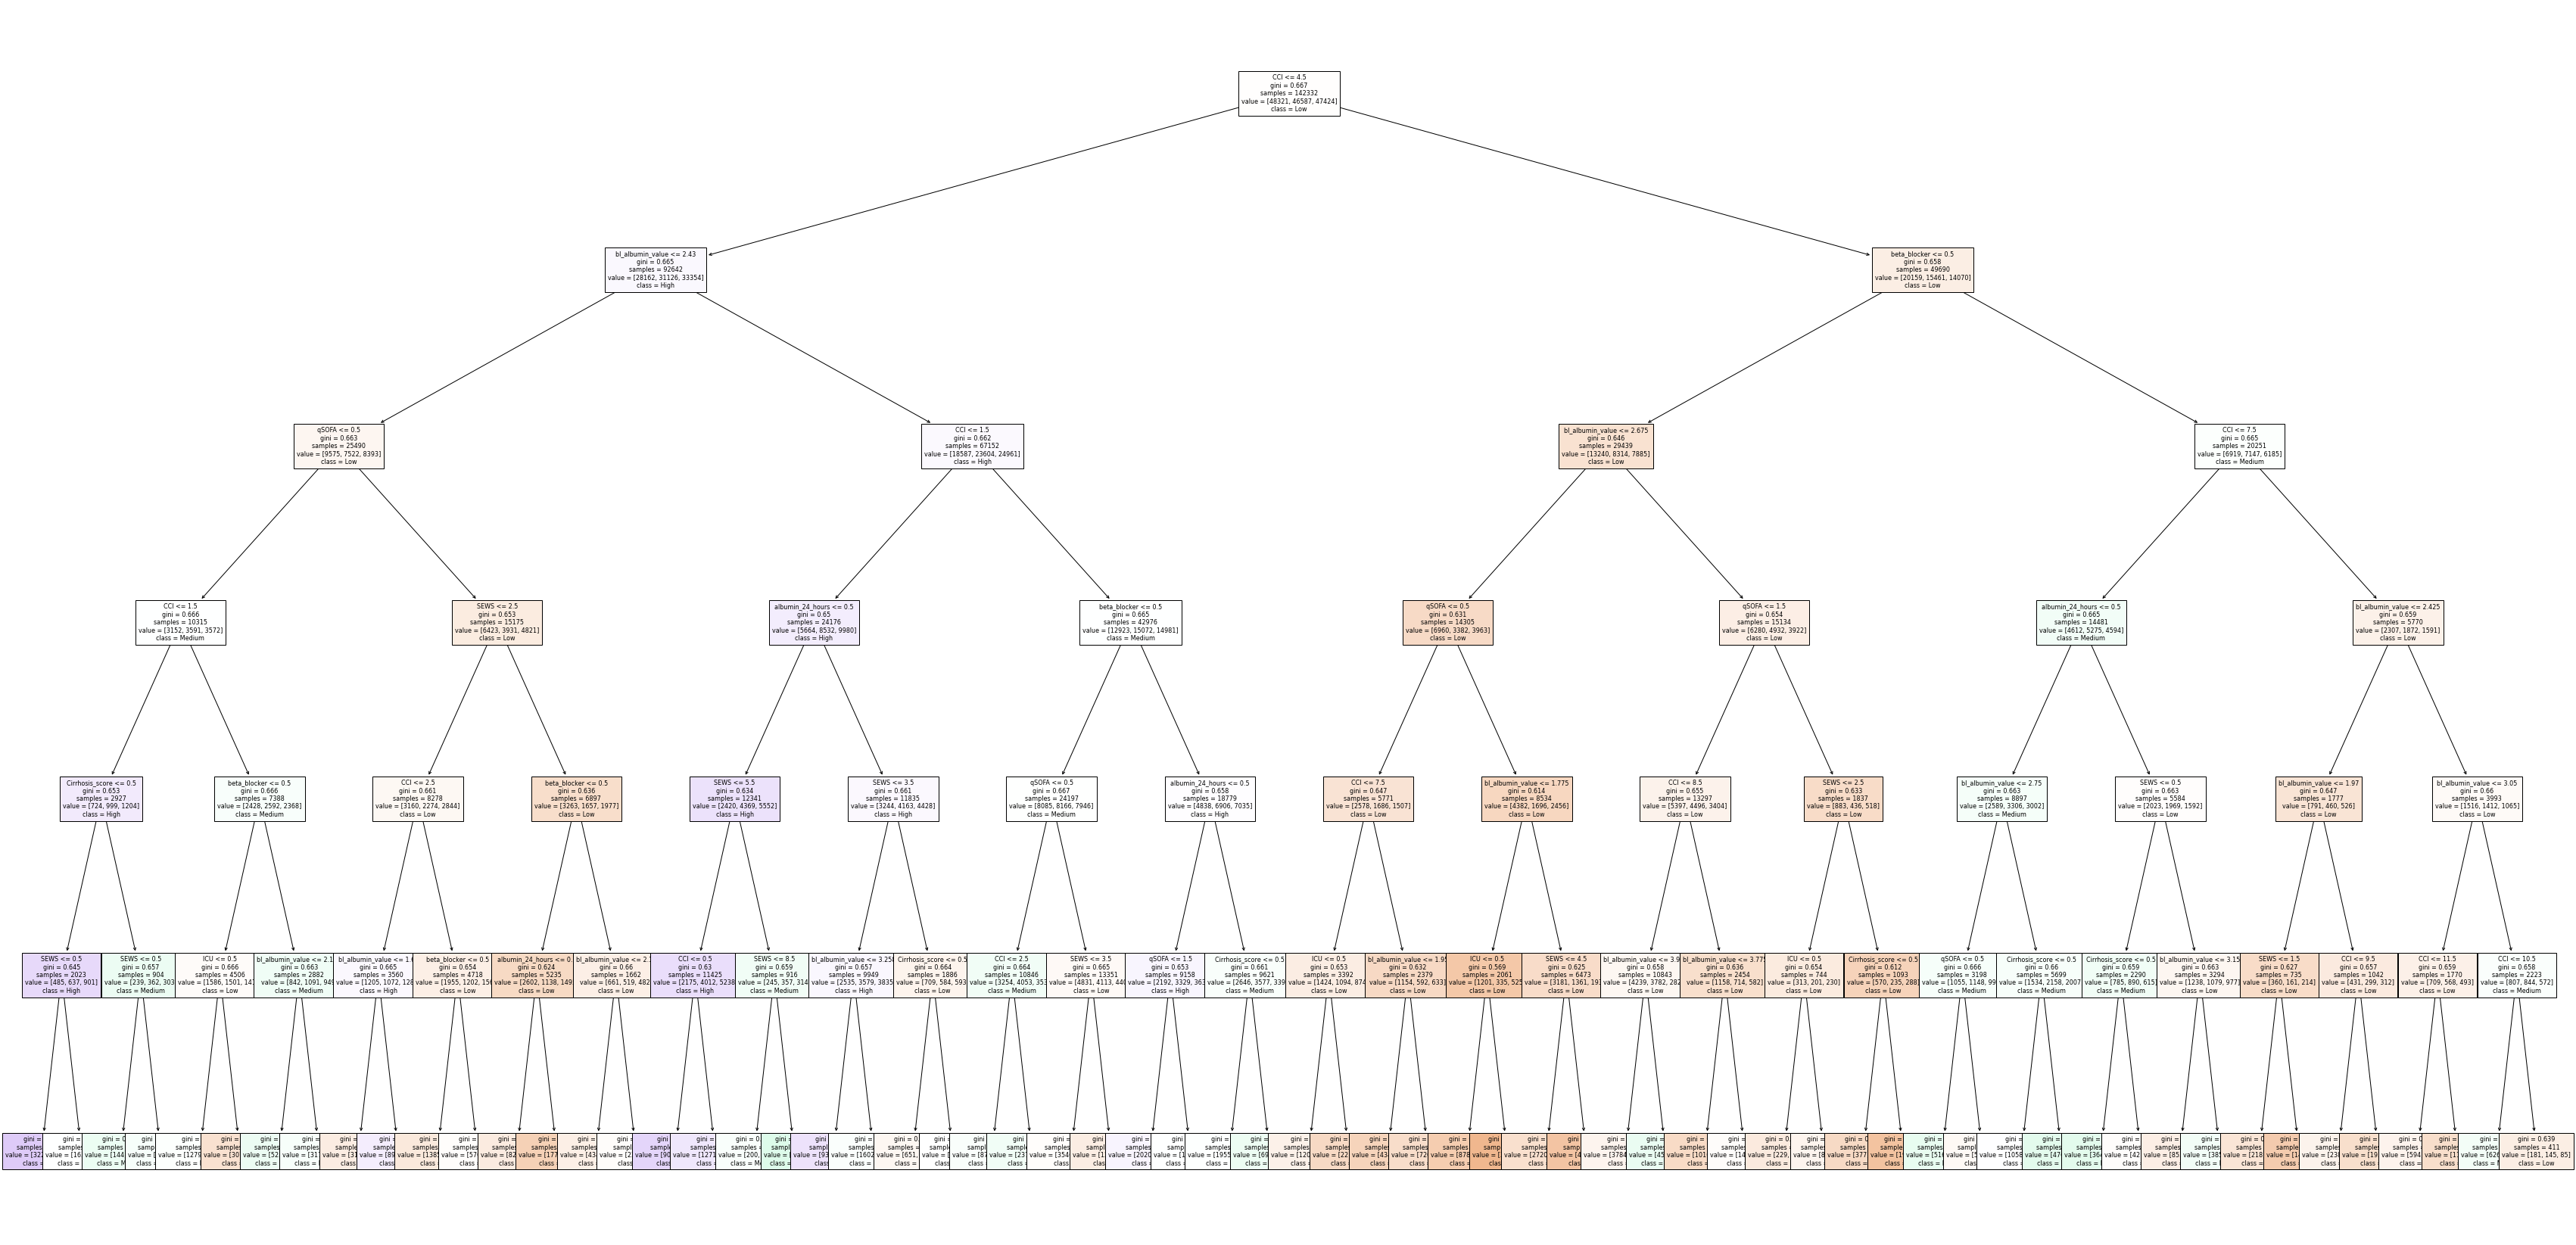

In [85]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [86]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('HFD_DT_D6_MATCHED_178K.png')

True

## 5: Decision Tree 

In [40]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

In [41]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

Feature: ICU Score: 0.02346
Feature: Cirrhosis Score: 0.00000
Feature: CCI Score: 0.17947
Feature: qSOFA Score: 0.03868
Feature: MELD Score: 0.50209
Feature: SEWS Score: 0.14406
Feature: albumin_24hrs Score: 0.11224


In [42]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [43]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1666 1119  760]
 [ 873 1587 1122]
 [ 867 1212 1424]]


In [44]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.49      0.47      0.48      3545
           1       0.41      0.44      0.42      3582
           2       0.43      0.41      0.42      3503

    accuracy                           0.44     10630
   macro avg       0.44      0.44      0.44     10630
weighted avg       0.44      0.44      0.44     10630



In [45]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[405 311 212]
 [250 348 280]
 [221 309 322]]


In [46]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.46      0.44      0.45       928
           1       0.36      0.40      0.38       878
           2       0.40      0.38      0.39       852

    accuracy                           0.40      2658
   macro avg       0.41      0.40      0.40      2658
weighted avg       0.41      0.40      0.41      2658



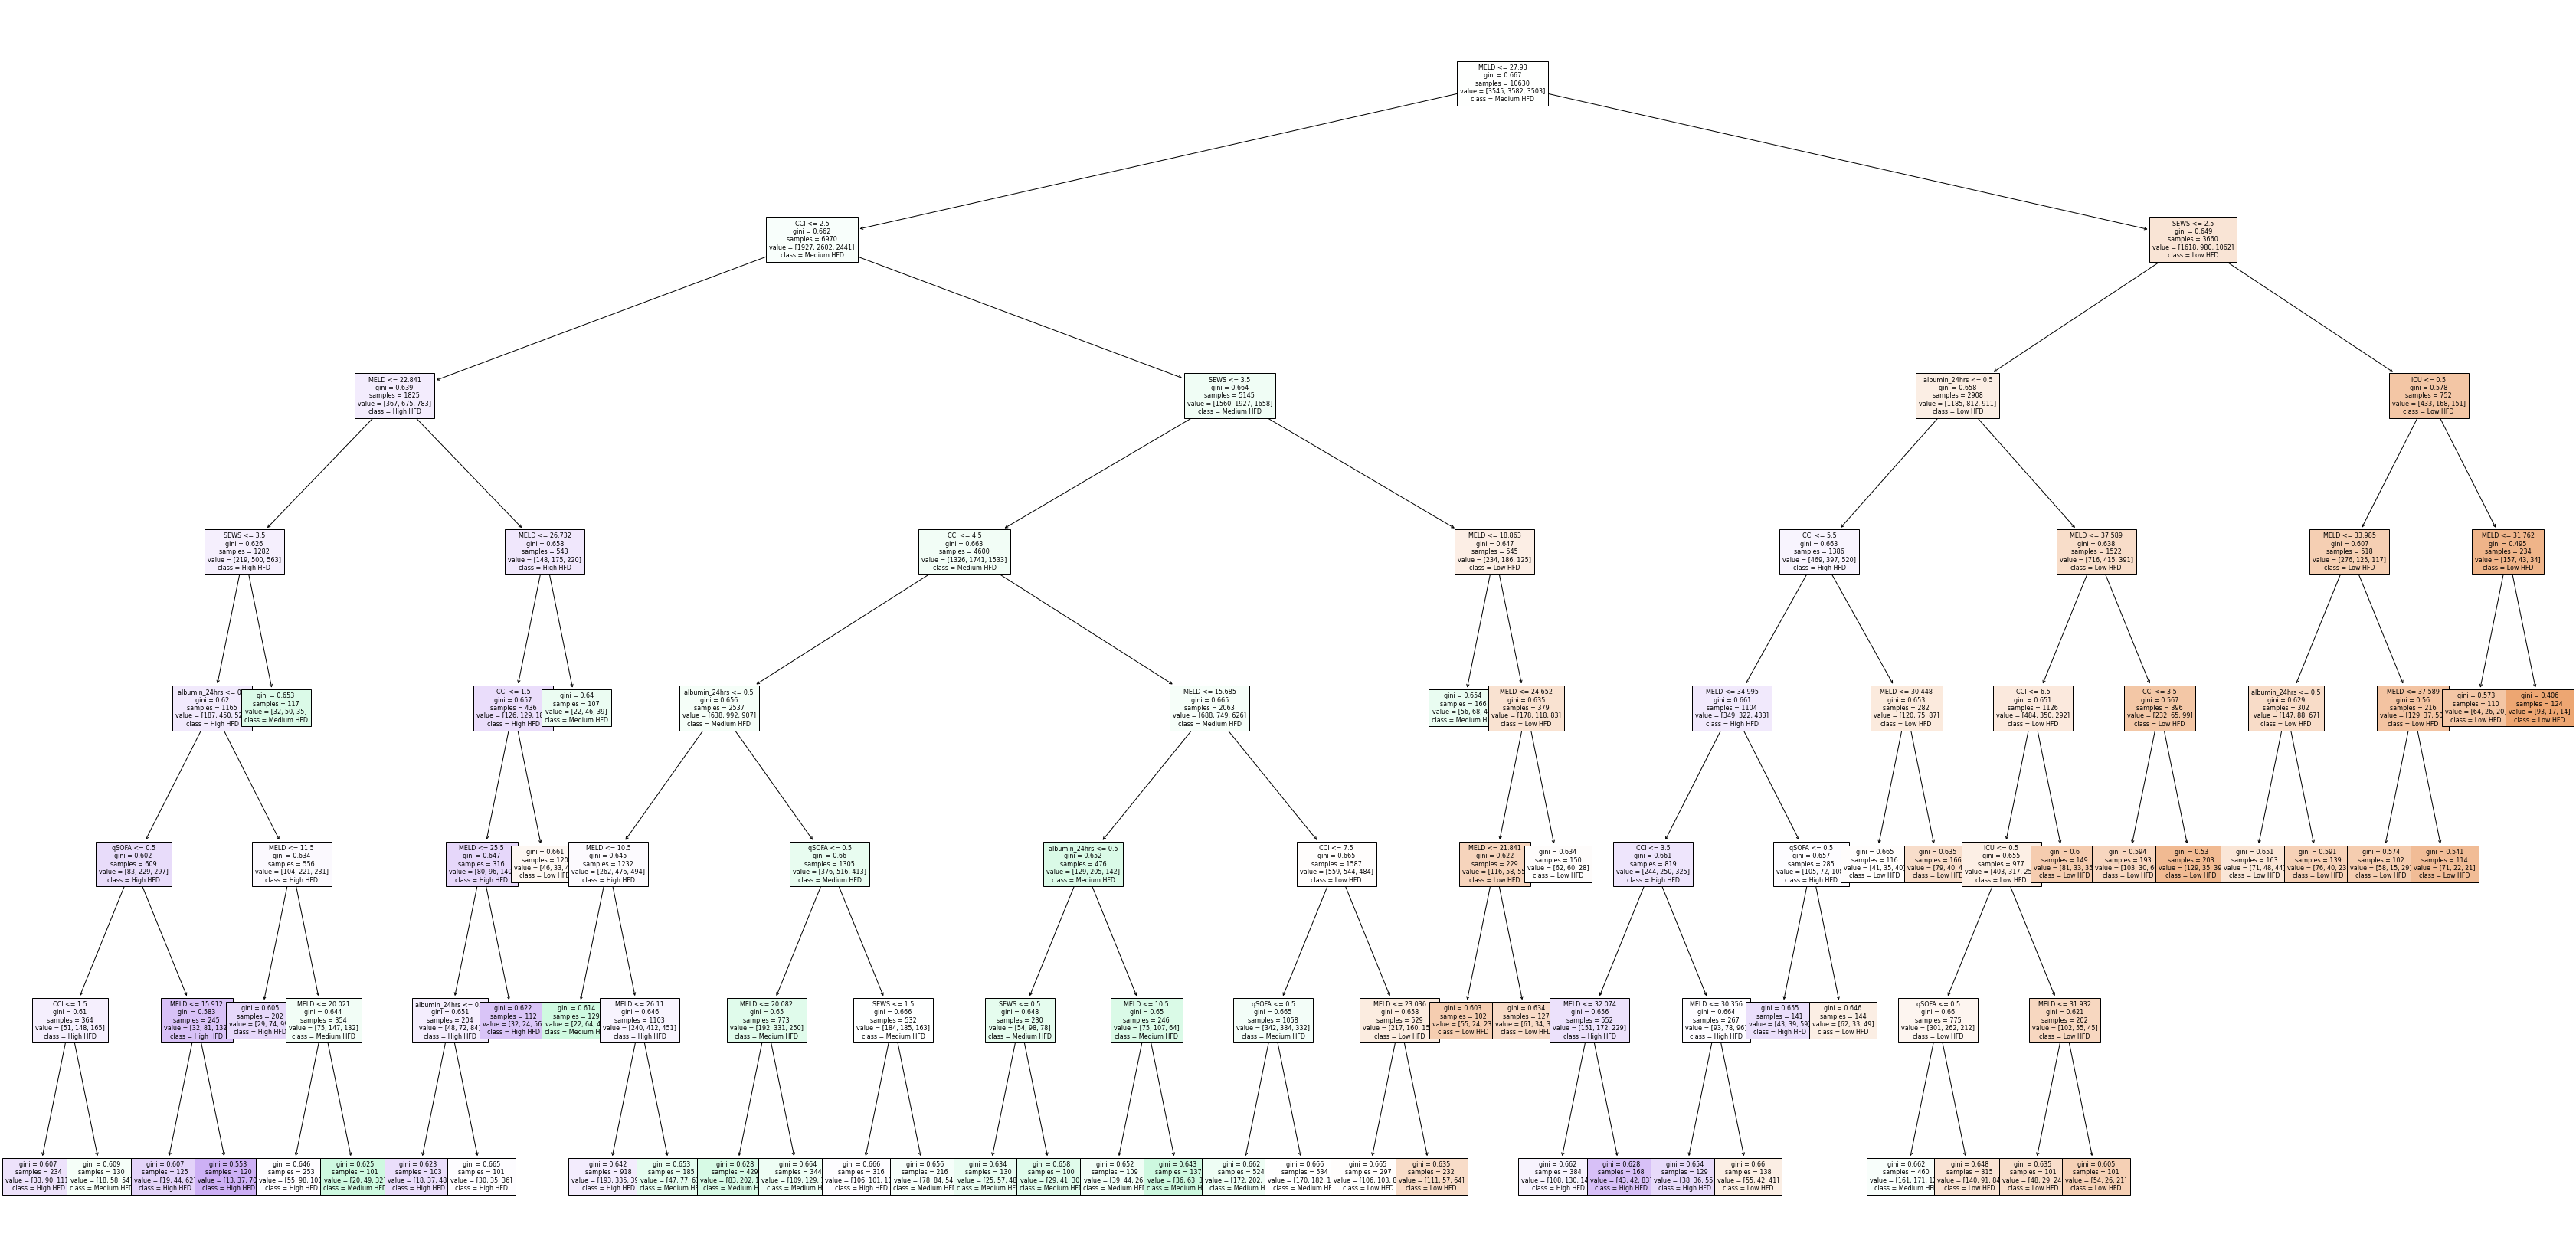

In [47]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [48]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('HFD_DT_D7_PSM_MATCHED.png')

True

## Random Forest

In [53]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [54]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [55]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[ 42478   6691  29106]
 [ 27499   9425  54026]
 [ 19704   6073 109965]]


In [56]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.47      0.54      0.51     78275
           1       0.42      0.10      0.17     90950
           2       0.57      0.81      0.67    135742

    accuracy                           0.53    304967
   macro avg       0.49      0.49      0.45    304967
weighted avg       0.50      0.53      0.48    304967



In [57]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[10737  1690  7277]
 [ 6864  2400 13411]
 [ 4863  1550 27450]]


In [58]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.48      0.54      0.51     19704
           1       0.43      0.11      0.17     22675
           2       0.57      0.81      0.67     33863

    accuracy                           0.53     76242
   macro avg       0.49      0.49      0.45     76242
weighted avg       0.50      0.53      0.48     76242



Feature: albumin_24hrs Score: 0.68268
Feature: ICU Score: 0.09195
Feature: CCI Score: 0.04476
Feature: qSOFA Score: 0.05184
Feature: beta_blocker Score: 0.05392
Feature: Cirrhosis_score Score: 0.02860
Feature: nutritional_anemia Score: 0.00242
Feature: SEWS Score: 0.04383


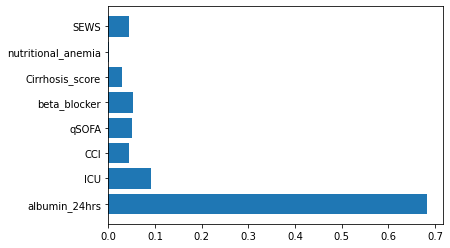

In [59]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()